# Airline Passenger Satisfaction

## Introducción
Se va a realizar un estudio de una encuesta de satisfacción a pasajeros de una aerolínea para crear un modelo de predicción que indique la satisfacción del cliente (Satisfecho, No satisfecho) a partir de la experiencia que proporciona la aerolínea.

A continuación. se mencionan los diferentes campos recogidos por la encuesta:

**Gender:** Género de los pasajeros (Female, Male)  
**Customer Typer:** Tipo de cliente (Loyal customer, disloyal customer)  
**Age:** Edad actual de los pasajeros  
**Type of Travel:** Propósito del viaje de los pasajeros (Personal Travel, Business Travel)  
**Class:** Clase de asiento del vuelo de los pasajeros (Business, Eco, Eco Plus)  
**Flight distance:** Distancia de vuelo de cada pasajero  
**Inflight wifi service:** Nivel de satisfacción del servicio wifi del vuelo (0:Not Applicable;1-5)  
**Departure/Arrival time convenient:** Nivel de satisfacción de la conveniencia de la hora de llegada y de salida (0: not rated; 1-5)  
**Ease of Online booking:** Nota de satisfacción de la reserva online (0: not rated; 1-5)  
**Gate location:** Nivel de satisfacción de puerta de embarque (0: not rated; 1-5)  
**Food and drink:** Nivel de satisfacción de la comida y bebida (0: not rated; 1-5)  
**Online boarding:** Nivel de satisfacción del embarque online (0: not rated; 1-5)  
**Seat comfort:** Nivel de satisación del confort del asiento (0: not rated; 1-5)  
**Inflight entertainment:** Nivel de satisfacción del entretenimiento durante el vuelo (0: not rated; 1-5)  
**On-board service:** Nivel de satisfacción del servicio a bordo (0: not rated; 1-5)  
**Leg room service:** Nivel de satisfacción del espacio para las piernas (0: not rated; 1-5)  
**Baggage handling:** Nivel de satisfacción del manejo del equipaje (0: not rated; 1-5)  
**Check-in service:** Nivel de satisfacción del servicio de check-in (0: not rated; 1-5)  
**Inflight service** Nivel de satisfacción del servicio durante el vuelo (0: not rated; 1-5)  
**Cleanliness:** Nivel de satisfacción de la limpieza (0: not rated; 1-5)  
**Departure Delay in Minutes:** Retraso de salida en minutos  
**Arrival Delay in Minutes:** Retraso de llegada en minutos  
**Satisfaction:** Nivel de satisfacción de la aerolinínea (Satisfaction, neutral or dissatisfaction)  

### Librerías empleadas

In [54]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.compat import lzip
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
import warnings
warnings.filterwarnings("ignore")

### Importación de los datos

In [6]:
DataTrain = pd.read_csv("train.csv")
DataTest = pd.read_csv("test.csv")

# EDA

## Resumen estadístico

In [7]:
print('Cantidad de filas y columnas: ',DataTrain.shape)

Cantidad de filas y columnas:  (103904, 25)


In [8]:
print('Nombre de columnas: ', DataTrain.columns)

Nombre de columnas:  Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')


In [9]:
DataTrain.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [10]:
DataTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [11]:
DataTrain.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,103904.0,51951.500000,29994.645522,0.0,25975.75,51951.5,77927.25,103903.0
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0


## Tratamiento de datos

Las primeras 2 columnas no son necesarias para el estudio asi que las vamos a eliminar.

In [12]:
DataTrain = DataTrain.drop(['Unnamed: 0', 'id'], axis=1)

In [13]:
DataTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

Vamos a cambiar los 0 de la encuesta (Not rated) y convertirlos en NA, excepto en la columna 'Inflight wifi service', la cual los 0 son no aplicable (Not Applicable).

In [14]:
DataTrain[DataTrain.columns[7:20]] = DataTrain[DataTrain.columns[7:20]].replace([0], [np.nan])

A continuación, vamos a ver los datos faltantes que tiene el dataframe

In [15]:
DataTrain.isna().sum()

Gender                                  0
Customer Type                           0
Age                                     0
Type of Travel                          0
Class                                   0
Flight Distance                         0
Inflight wifi service                   0
Departure/Arrival time convenient    5300
Ease of Online booking               4487
Gate location                           1
Food and drink                        107
Online boarding                      2428
Seat comfort                            1
Inflight entertainment                 14
On-board service                        3
Leg room service                      472
Baggage handling                        0
Checkin service                         1
Inflight service                        3
Cleanliness                            12
Departure Delay in Minutes              0
Arrival Delay in Minutes              310
satisfaction                            0
dtype: int64

Vemos que existen datos faltantes en el dataframe pero no muchos en comparación con  los totales. Ahora vamos a estudiar la distribución de estos datos faltantes.

Text(0.5, 1.0, 'Distribución de valores faltantes')

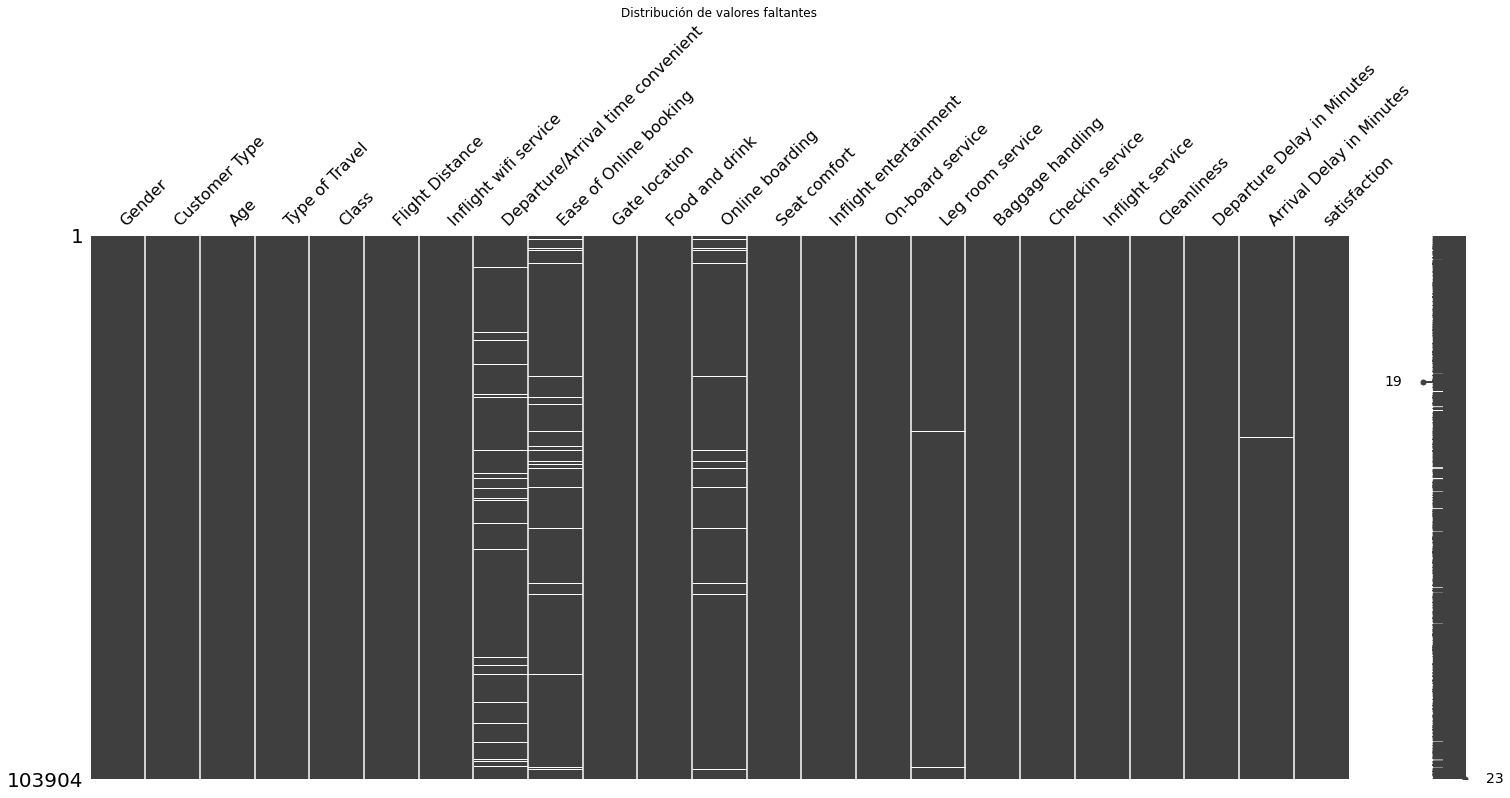

In [16]:
msno.matrix(DataTrain)
plt.title('Distribución de valores faltantes')

Text(0.5, 1.0, 'Mapa de calor de valores faltantes')

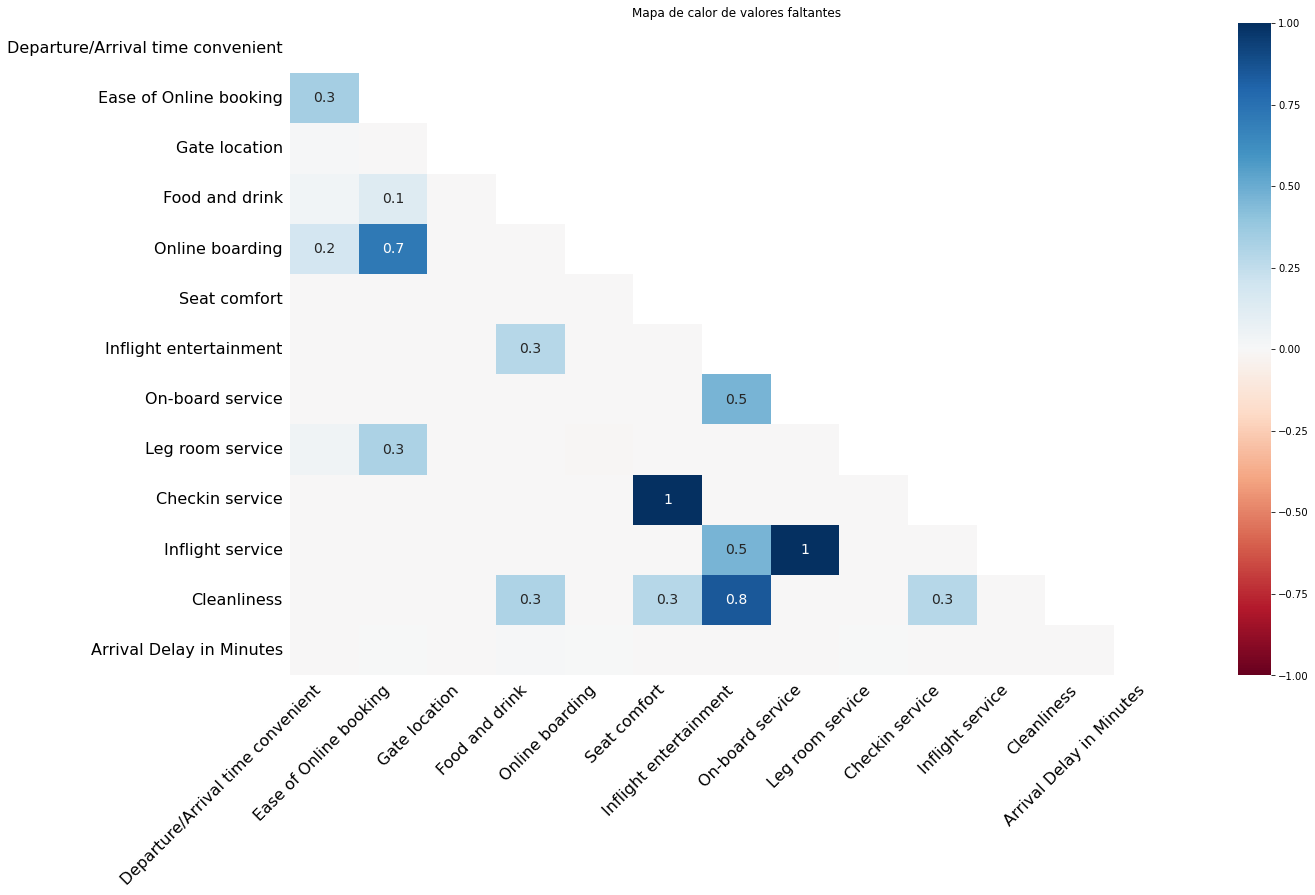

In [17]:
msno.heatmap(DataTrain)
plt.title('Mapa de calor de valores faltantes')

<AxesSubplot:>

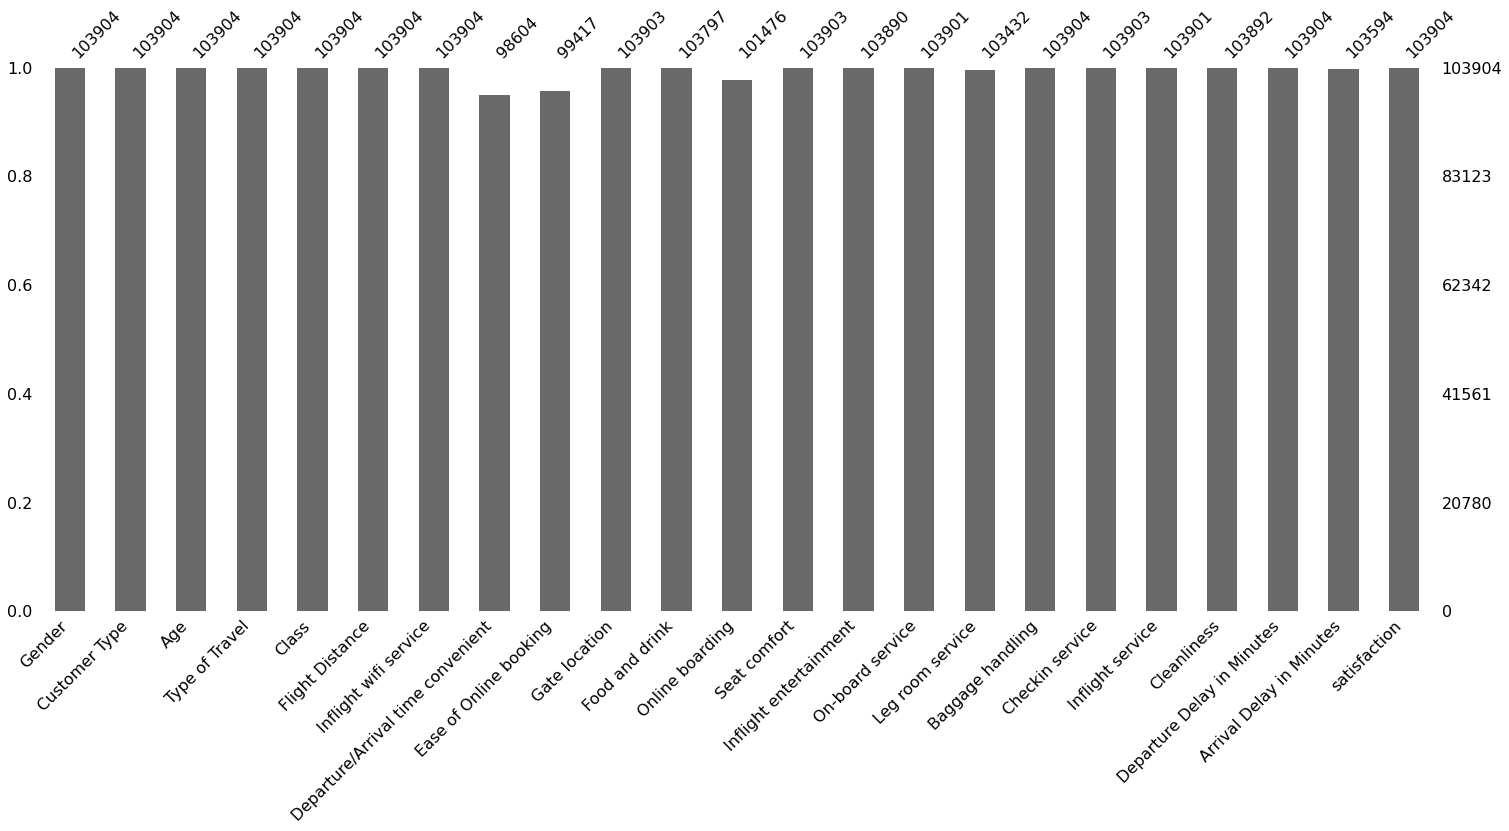

In [18]:
msno.bar(DataTrain)

Con la ayudad de los gráficos vemos que la distribución de los valores faltantes es bastante aleatoria. Por otro lado, aunque si que vemos que hay una correlación directa entre los valores faltantes de, por ejemplo, las columnas del servicio check-in y el confort del asiento, no las hay con respecto a las demás columnas que poseen valores faltantes en la misma fila. Además podemos ver que el numero de valores faltantes es muy pequeño con respecto del total de datos, por lo que vamos a optar por sustituir los valores faltantes de cada columna por la mediana de la misma.

In [19]:
DataTrain['Departure/Arrival time convenient'] = DataTrain['Departure/Arrival time convenient'].fillna(DataTrain['Departure/Arrival time convenient'].median())
DataTrain['Ease of Online booking'] = DataTrain['Ease of Online booking'].fillna(DataTrain['Ease of Online booking'].median())
DataTrain['Gate location'] = DataTrain['Gate location'].fillna(DataTrain['Gate location'].median())
DataTrain['Food and drink'] = DataTrain['Food and drink'].fillna(DataTrain['Food and drink'].median())
DataTrain['Online boarding'] = DataTrain['Online boarding'].fillna(DataTrain['Online boarding'].median())
DataTrain['Seat comfort'] = DataTrain['Seat comfort'].fillna(DataTrain['Seat comfort'].median())
DataTrain['Inflight entertainment'] = DataTrain['Inflight entertainment'].fillna(DataTrain['Inflight entertainment'].median())
DataTrain['On-board service'] = DataTrain['On-board service'].fillna(DataTrain['On-board service'].median())
DataTrain['Leg room service'] = DataTrain['Leg room service'].fillna(DataTrain['Leg room service'].median())
DataTrain['Checkin service'] = DataTrain['Checkin service'].fillna(DataTrain['Checkin service'].median())
DataTrain['Inflight service'] = DataTrain['Inflight service'].fillna(DataTrain['Inflight service'].median())
DataTrain['Cleanliness'] = DataTrain['Cleanliness'].fillna(DataTrain['Cleanliness'].median())
DataTrain['Arrival Delay in Minutes'] = DataTrain['Arrival Delay in Minutes'].fillna(DataTrain['Arrival Delay in Minutes'].median())

In [20]:
DataTrain.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [21]:
DataTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  float64
 8   Ease of Online booking             103904 non-null  float64
 9   Gate location                      103904 non-null  float64
 10  Food and drink                     103904 non-null  float64
 11  Online boarding                    1039

Ahora vemos que una vez tratados los datos faltantes, el tipo de variable de las columnas tratadas ha cambiado a tipo float pese a no contener decimales, asi que vamos a cambiar el tipo de dato de esas columnas a tipo int64.

In [22]:
Columnas_encuesta =list(range(6,20))
DataTrain.iloc[:,Columnas_encuesta] = DataTrain.iloc[:,Columnas_encuesta].astype('int64')

In [23]:
DataTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

# Visualización

### Estudio de la variable objetivo(target)

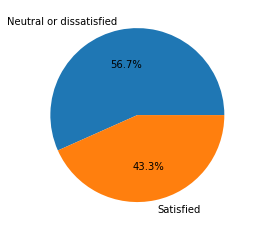

In [24]:
plt.pie(DataTrain.satisfaction.value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"], autopct = '%1.1f%%')
pass

Vemos que el 56,7% de los clientes estan insatisfechos o neutrales mientras que el 43,3% estan satisfechos.

### Estudio individual de las variables cualitativas

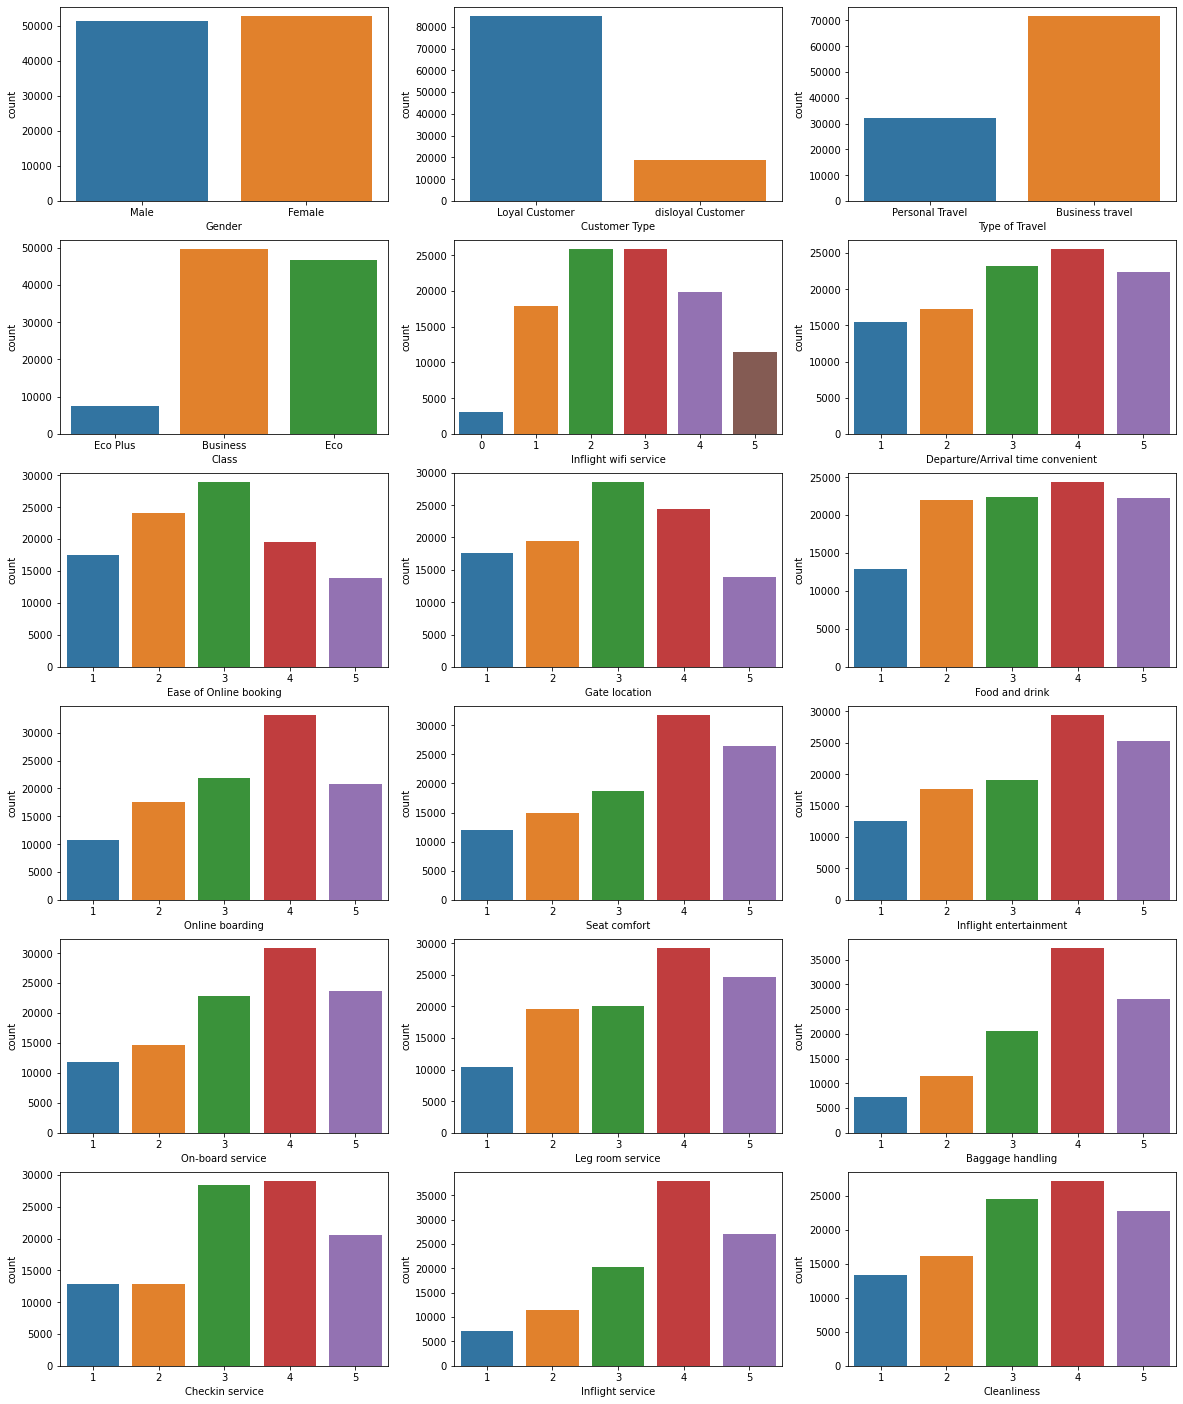

In [25]:
Columnas_categoria = [0,1,3,4] + list(range(6,20))
fig, axes = plt.subplots(6, 3, figsize = (20, 25))
for i, col in enumerate(DataTrain.iloc[:,Columnas_categoria]):
    sns.countplot(data=DataTrain, x=col, ax=axes[i//3, i%3])
plt.show()

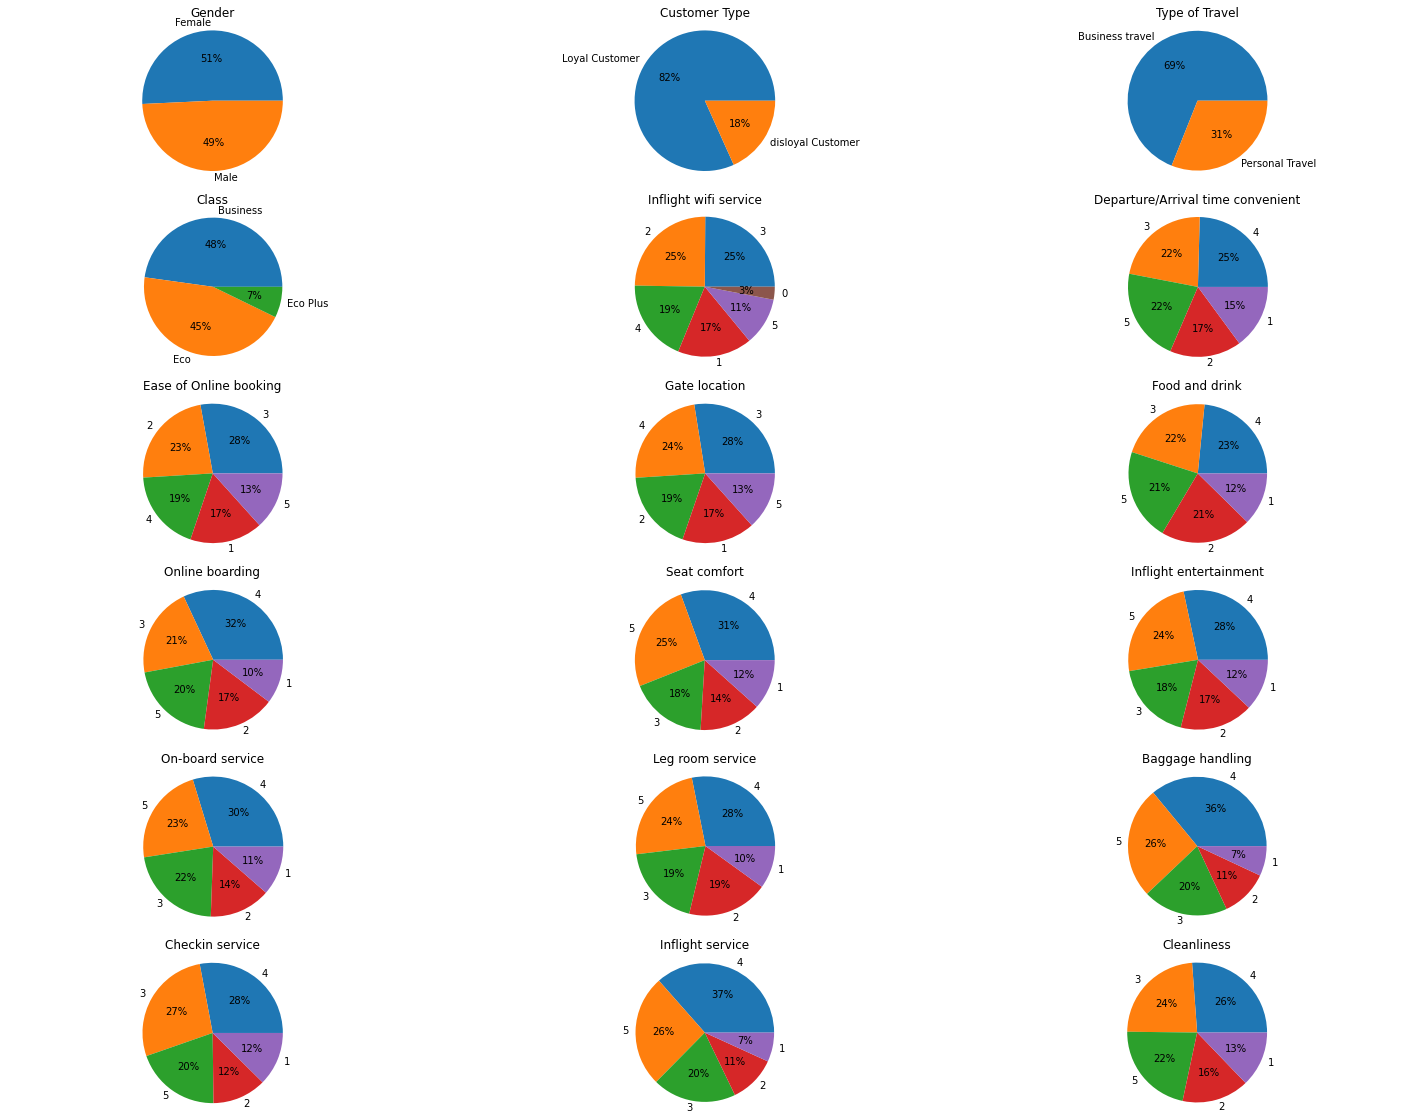

In [26]:
Columnas_categoria = [0,1,3,4] + list(range(6,20))
fig, axes = plt.subplots(6, 3, figsize = (25, 20))
for i, col in enumerate(DataTrain.iloc[:,Columnas_categoria]):
    column_values = DataTrain[col].value_counts()
    labels = column_values.index
    sizes = column_values.values
    axes[i//3, i%3].pie(sizes, labels = labels, autopct = '%1.0f%%')
    axes[i//3, i%3].axis('equal')
    axes[i//3, i%3].set_title(col)
plt.show()

Algunas conclusiones que podemos sacar de éstas variables son:
+ Hay el mismo número de mujeres que de hombres.
+ El 82% de los clientes son leales.
+ Alrededor de dos tercios de los pasajeros vuelan por negocios.
+ Casi la mitad de los clientes vuelan en Bussiness, un 45% en clase Eco y solo un 7% en clase Eco Plus.
+ Solo un 3% de los clientes no contaron con servicio wifi durante su vuelo.
+ Las puntuaciones de cada servicio son diversas siendo un 4 la nota mas común en todos los servicios.

### Estudio individual de las variables cuantitativas

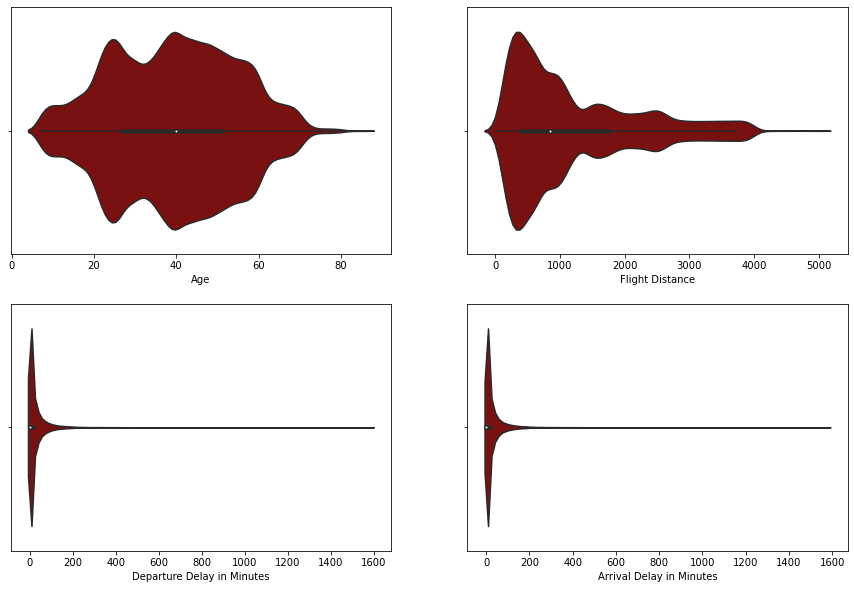

In [27]:
Columnas_numericas=[2,5,20,21]
fig, axes = plt.subplots(2, 2, figsize = (15, 10))
for i, col in enumerate(DataTrain.iloc[:,Columnas_numericas]):
    sns.violinplot(data=DataTrain, x=col, color='darkred', ax=axes[i//2, i%2])
plt.show()

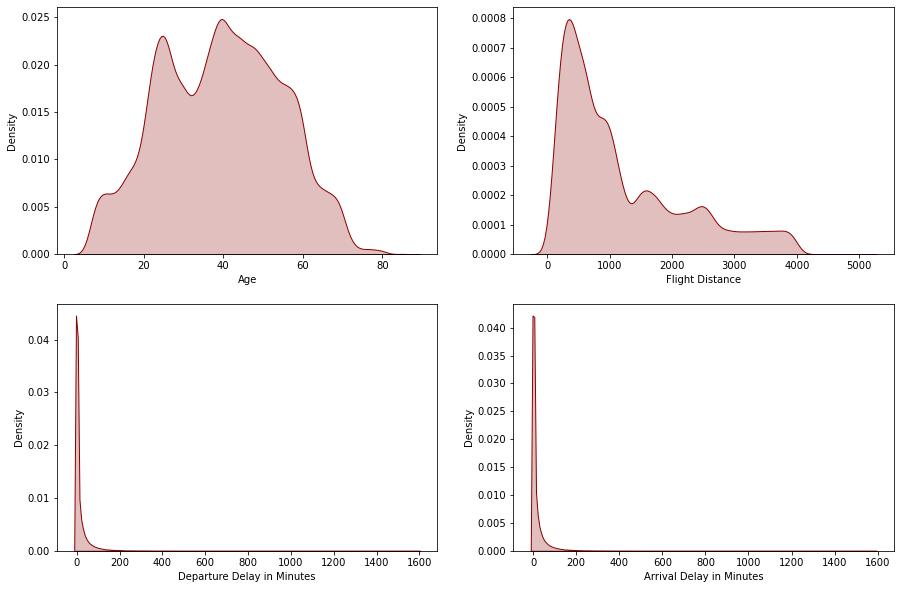

In [28]:
Columnas_numericas=[2,5,20,21]
fig, axes = plt.subplots(2, 2, figsize = (15, 10))
for i, col in enumerate(DataTrain.iloc[:,Columnas_numericas]):
    sns.kdeplot(data=DataTrain, x=col, ax=axes[i//2, i%2], color='darkred', fill='darkred')
plt.show()

Algunas conclusiones que podemos obtener de los gráficos anteriores son:
+ La mayoría de los pasajeros tienen entre 28 y 50 años sinedo 40 la mediana.
+ La mayoría de los vuelos son de entre 500 a 1800 km de distacia siendo la mediana de alrededor de 900km.
+ Los retraso de salida y de llegada son prácticamente inexistentes en ambos casos, existiendo algunos casos puntuales.

### Estudio de todas las variables en función de la variable objetivo (target)

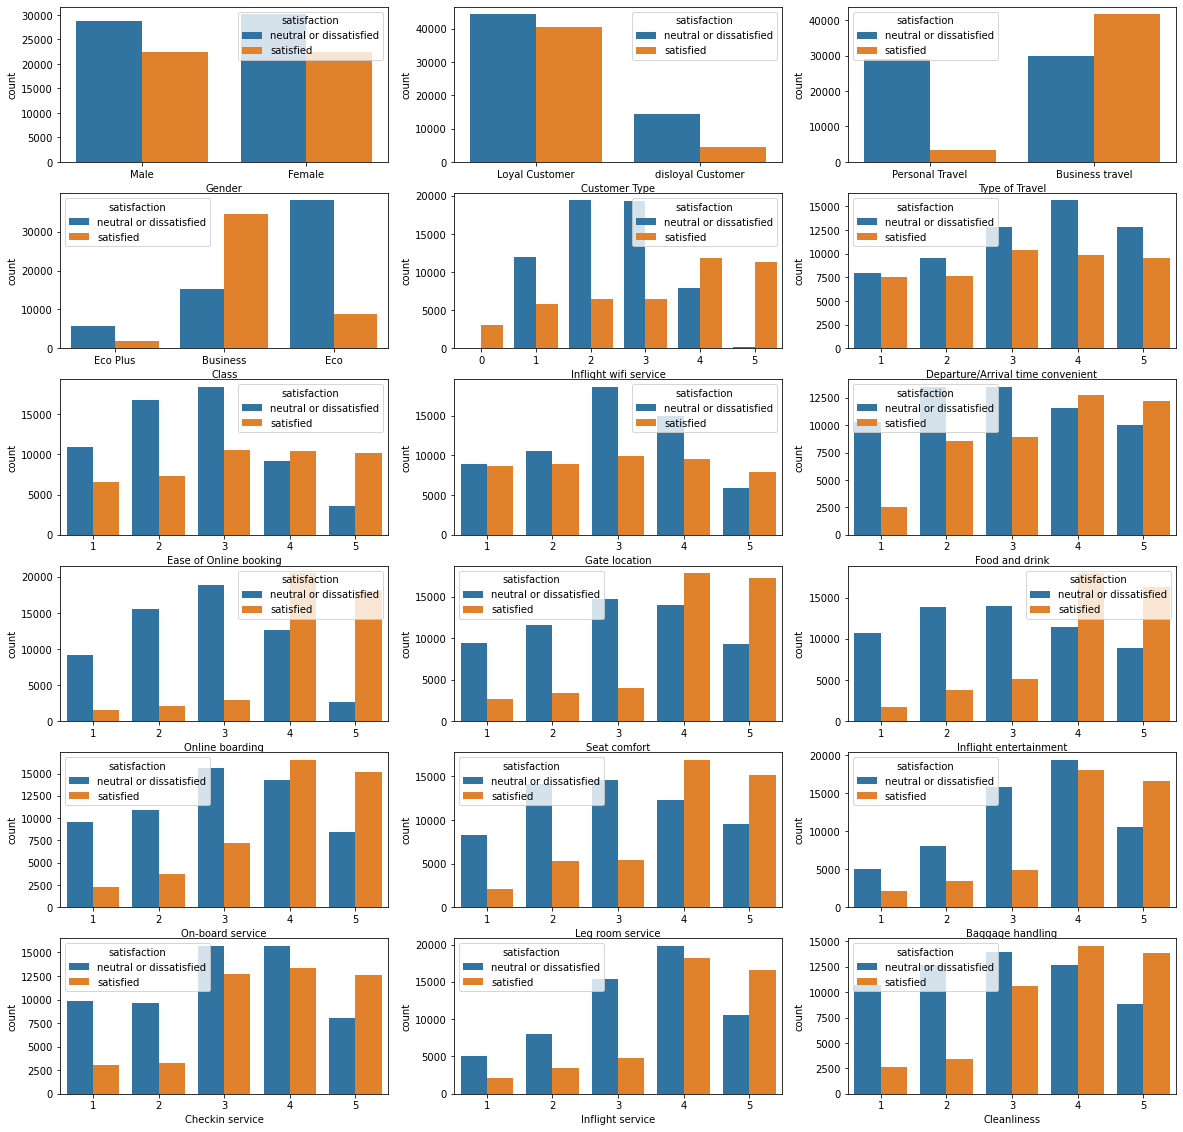

In [29]:
fig, axes = plt.subplots(6, 3, figsize = (20, 20))
for i, col in enumerate(DataTrain.iloc[:,Columnas_categoria]):
    sns.countplot(data=DataTrain, x=col, hue='satisfaction', ax=axes[i//3, i%3])
plt.show()

Algunas conclusiones que podemos sacar de estos gráficos son:
+ El nivel de satisfacción no depende del género del cliente
+ El porcentaje de satisfechos en clientes leales es de alrededor del 45% mientras que en clientes no leales es de apenas el 30%.
+ Las personas que viajan por trabajo tienden a estar más satisfechas mientras que las personas que viajan por motivos personales son muy propensas a estar insatisfechas o neutrales. 
+ Dos tercios de las personas que viajan en clase business estan satisfechas mientras que las personas que viajan en clase eco o eco plus tienden a estar insatisfechas o neutrales.
+ Las personas que puntuaron con un 5 alguno de los servicios del viaje tienden a estar satisfechas siendo más evidente en el caso del servicio wifi y del embarco online.
+ Las personas que puntuaron de 1-3 los servicios del viaje son propensas a estar insatisfechas o neutrales. 

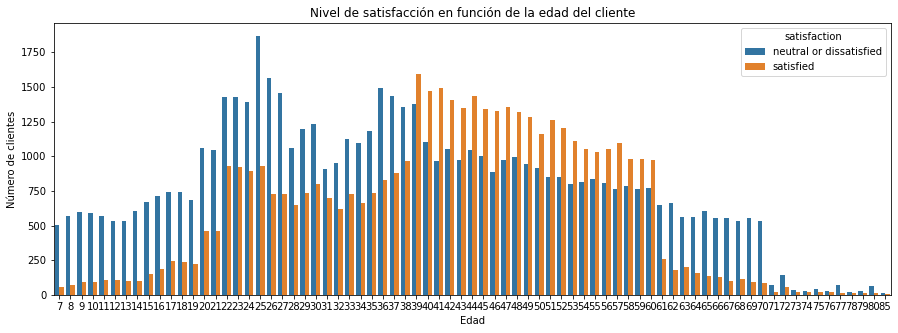

In [30]:
fig, ax = plt.subplots(figsize = (15, 5))
sns.countplot(data=DataTrain, x='Age', hue='satisfaction', ax=ax).set(title='Nivel de satisfacción en función de la edad del cliente')
plt.xlabel('Edad')
plt.ylabel('Número de clientes')
pass

Los clientes que tienen entre 39 y 60 años son más propensos a estar satisfechos mientras que el resto son más propensos a estar insatisfechos o neutrales.

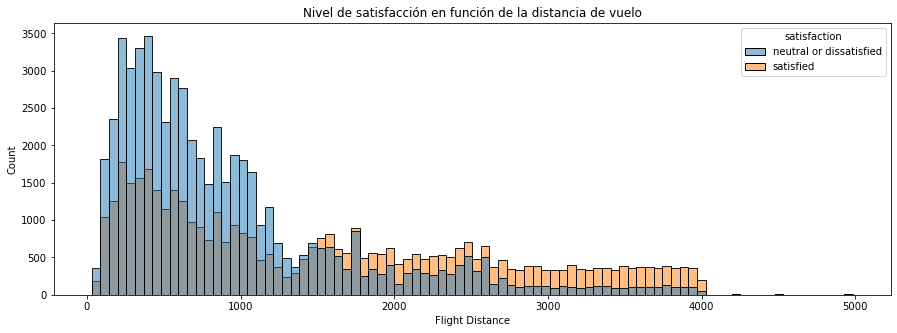

In [31]:
fig, ax = plt.subplots(figsize = (15, 5))
sns.histplot(data=DataTrain, x='Flight Distance', hue='satisfaction', ax=ax).set(title='Nivel de satisfacción en función de la distancia de vuelo')
pass

Podemos observar que en los vuelos de más de 1500km de distancia el cliente tiene a estar satisfecho mientras que en los vuelo de menos de 1500 km de distancia, éste tiende a estra insatisfecho o neutral.

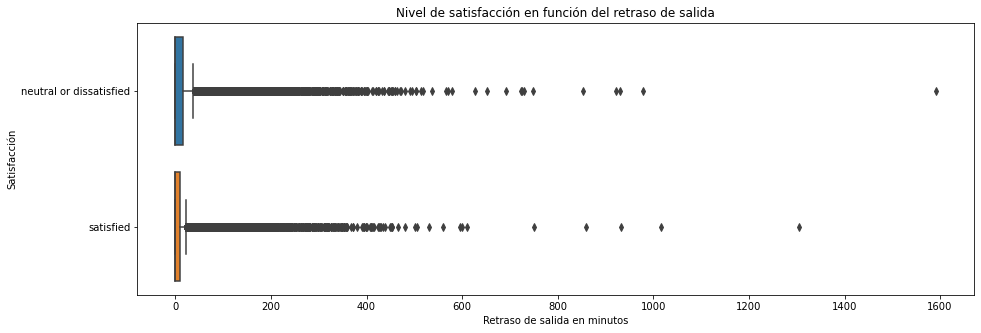

In [32]:
fig, ax = plt.subplots(figsize = (15, 5))
sns.boxplot(data=DataTrain, x='Departure Delay in Minutes', y='satisfaction', ax=ax).set(title='Nivel de satisfacción en función del retraso de salida')
plt.xlabel('Retraso de salida en minutos')
plt.ylabel('Satisfacción')
pass

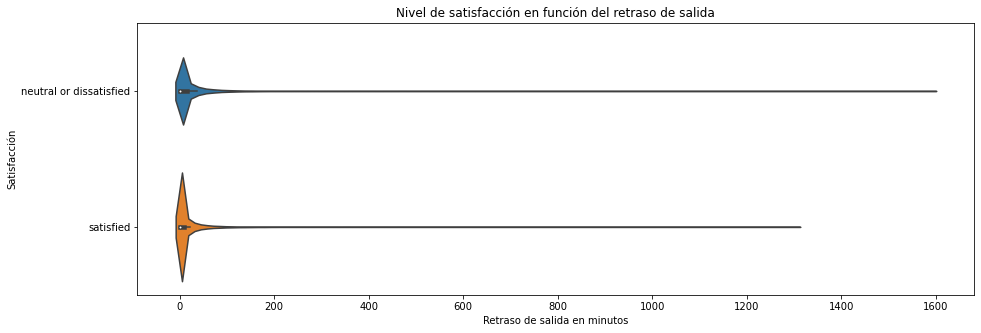

In [33]:
fig, ax = plt.subplots(figsize = (15, 5))
sns.violinplot(data=DataTrain, x='Departure Delay in Minutes', y='satisfaction', ax=ax).set(title='Nivel de satisfacción en función del retraso de salida')
plt.xlabel('Retraso de salida en minutos')
plt.ylabel('Satisfacción')
pass

Podemos observar que la satisfacción del cliente no depende del retraso de salida.

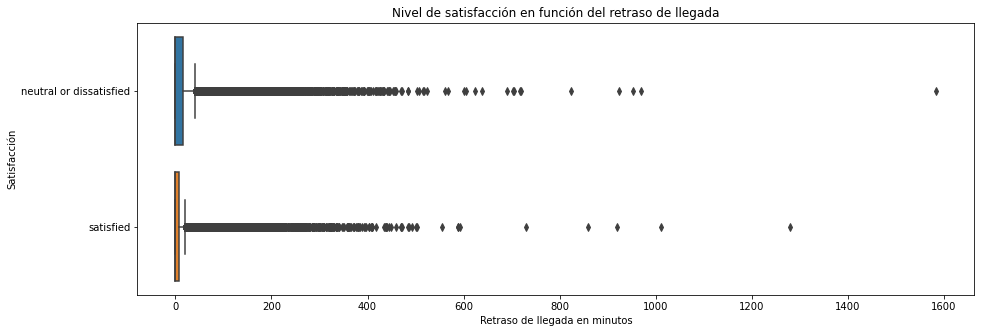

In [34]:
fig, ax = plt.subplots(figsize = (15, 5))
sns.boxplot(data=DataTrain, x='Arrival Delay in Minutes', y='satisfaction', ax=ax).set(title='Nivel de satisfacción en función del retraso de llegada')
plt.xlabel('Retraso de llegada en minutos')
plt.ylabel('Satisfacción')
pass

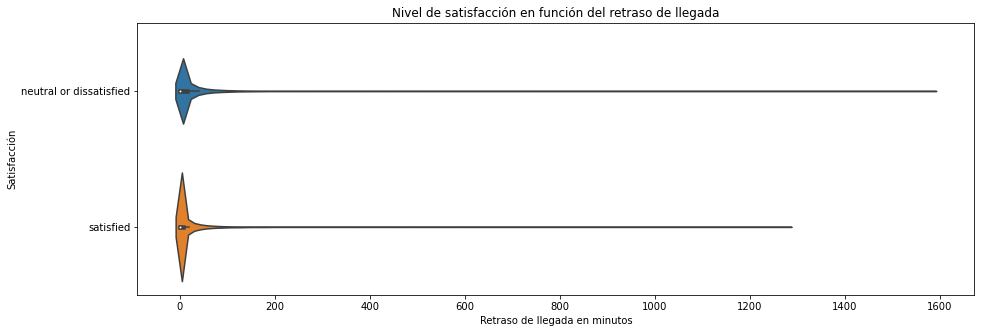

In [92]:
fig, ax = plt.subplots(figsize = (15, 5))
sns.violinplot(data=DataTrain, x='Arrival Delay in Minutes', y='satisfaction', ax=ax).set(title='Nivel de satisfacción en función del retraso de llegada')
plt.xlabel('Retraso de llegada en minutos')
plt.ylabel('Satisfacción')
pass

Podemos observar que la satisfacción del cliente tampoco depende del retraso de llegada.

### Estudio multivariante

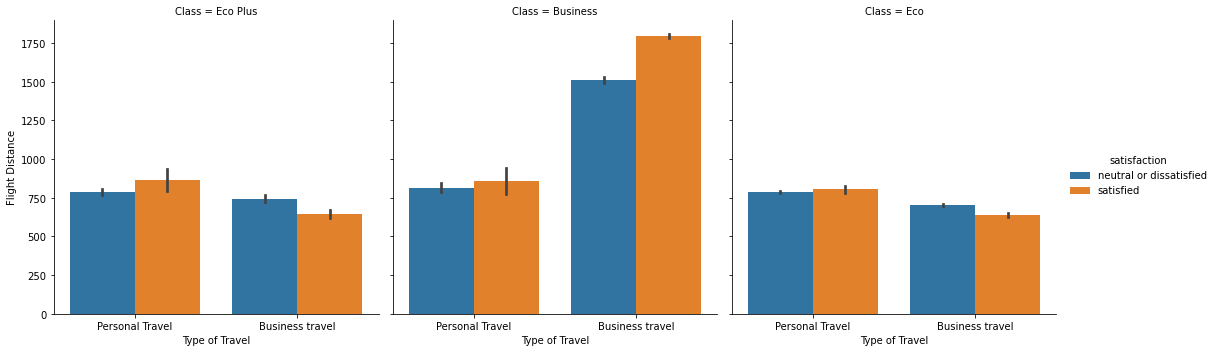

In [106]:
sns.catplot(x='Type of Travel', y='Flight Distance', hue='satisfaction', col='Class', data=DataTrain, kind='bar')
pass

En los clientes que viajan en clase business por trabajo largas distancias, hay mayor cantidad de satisfechos que dissatisfechos o neutrales. Para las demás combinaciones no hay diferencia en la distribución de satisfechos e insatisfechos o neutrales.

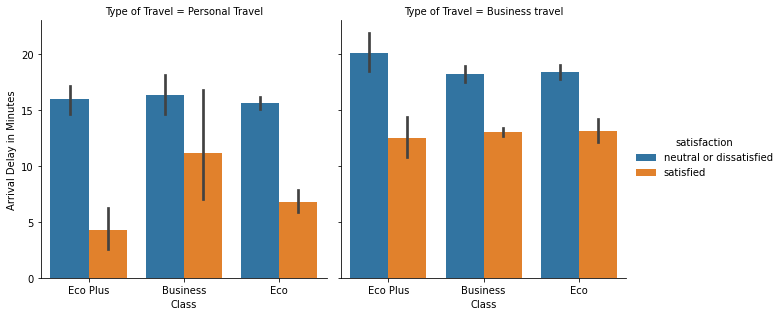

In [111]:
sns.catplot(x='Class', y='Arrival Delay in Minutes', hue='satisfaction', col='Type of Travel', data=DataTrain, kind='bar', height=4.5)
pass

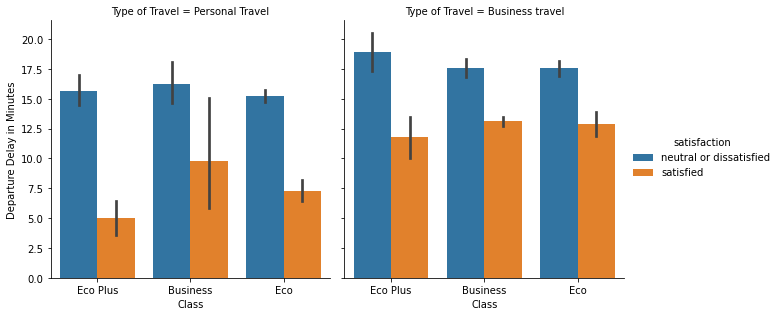

In [110]:
sns.catplot(x='Class', y='Departure Delay in Minutes', hue='satisfaction', col='Type of Travel', data=DataTrain, kind="bar", height=4.5)
pass

En los viajes por motivos personales en clase eco y eco plus el número de clientes insatisfechos o neutrales es mayor cuando el retraso de salida o de llegada es alto.

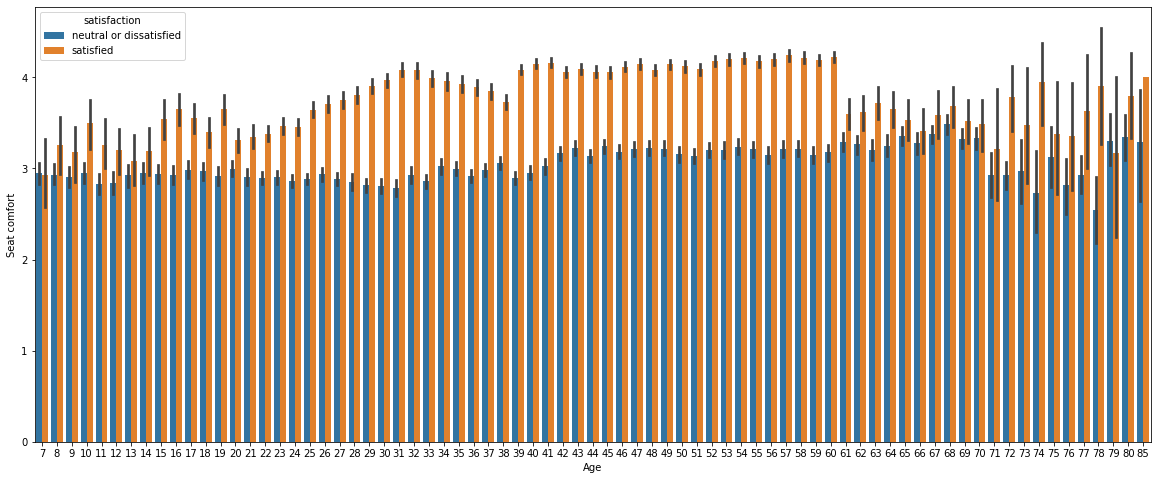

In [115]:
fig, ax = plt.subplots(figsize = (20, 8))
sns.barplot(x="Age", y="Seat comfort", hue="satisfaction", data=DataTrain)
pass

Independientemente de la edad, cuanto mayor es la puntuación de confort del asiento, mayor es la satisfacción del cliente.

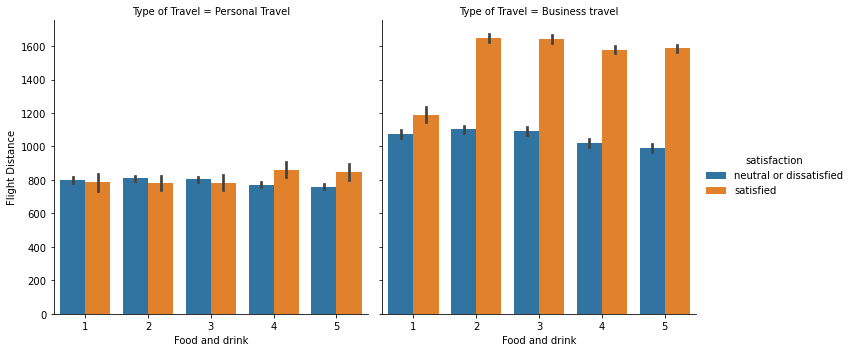

In [124]:
sns.catplot(x='Food and drink', y='Flight Distance', col='Type of Travel', hue='satisfaction', data=DataTrain, kind='bar')
pass

En los viajes de grandes distancias por negocios, hay mayor número de clientes satisfechos si han puntuado con 2 o más la comida y bebida. Para los clientes que han viajado por motivos personales hay un ligero mayor número de clientes satisfechos si éstos han votando con un 4 o 5 el servicio de comida y bebida.

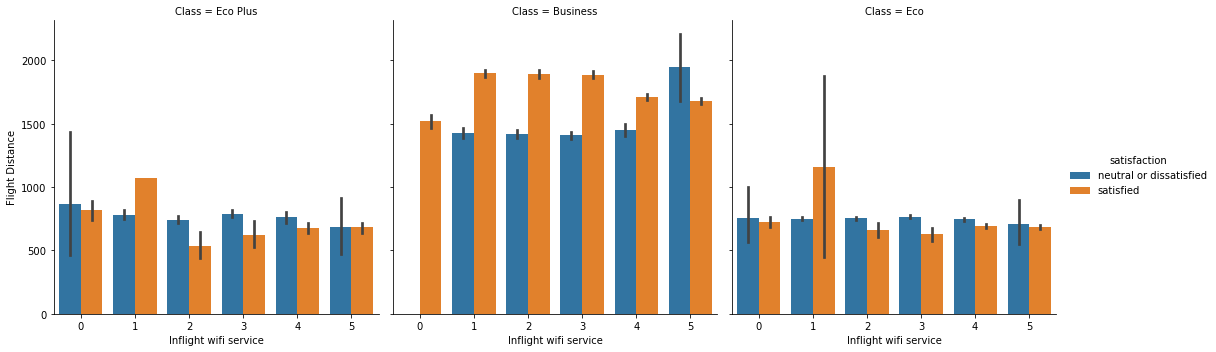

In [117]:
sns.catplot(x='Inflight wifi service', y='Flight Distance', hue='satisfaction', col='Class', data=DataTrain, kind='bar')
pass

No parece haber relación entre la distancia de vuelo y la puntuación al servicio wifi con la satisfación del cliente. De hecho los clientes que viajaron en business sin servicio wifi durante el vuelo estan todos satisfechos mientras que los que hicieron un viaje largo en clase business pese a puntuar con un 5 el servicio wifi, hay mayor número de insatisfechos o neutrales.

### Correlaciones

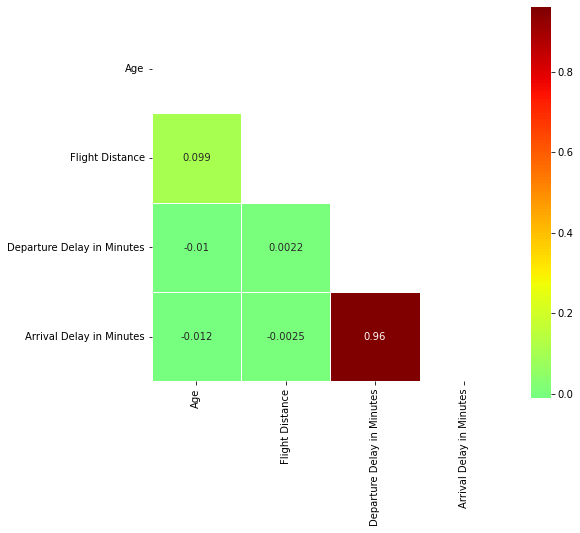

In [130]:
DataTrain_num=DataTrain[['Age', 'Flight Distance','Departure Delay in Minutes', 'Arrival Delay in Minutes']].copy()
DataTrain_corr=DataTrain_num.corr()
mask = np.triu(np.ones_like(DataTrain_corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(DataTrain_corr, cmap='jet', mask=mask, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})
pass

De este gráfico podemos obtener las siguientes conclusiones:
+ Existe una correlación fuerte positiva entre los minutos de retraso de salida y los de retraso de llegada.
+ La correlación es inexitente entre el resto de variables.

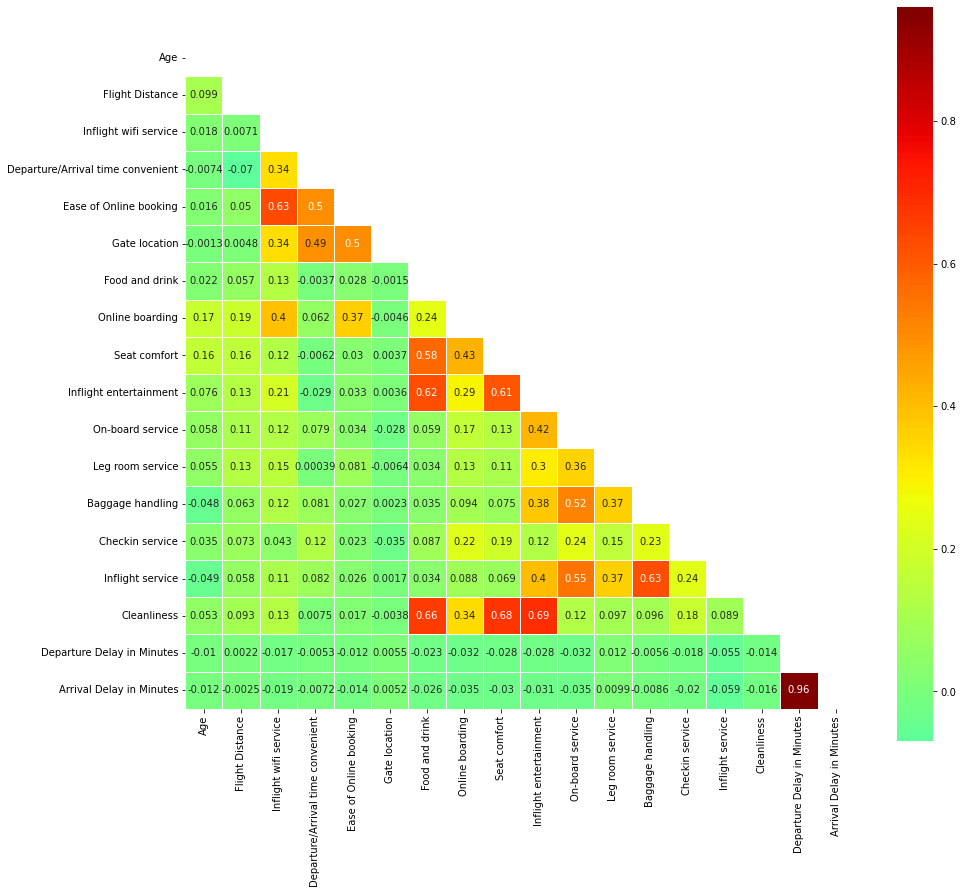

In [129]:
DataTrain_corr1=DataTrain.corr()
mask = np.triu(np.ones_like(DataTrain_corr1, dtype=np.bool))
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(DataTrain_corr1, cmap='jet', mask=mask, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})
pass

Del siguiente gráfico podemos obtener las siguientes concluisones:
+ La reserva online tiene una correlación alta positiva con el servicio wifi durante el vuelo y con la conveniencia de la hora de llegada y de salida.
+ El confort del asiento tiene una correlación alta positiva con la comida y bebida.
+ El entretenimiento durante el vuelo tiene una correlación alta positiva con la comida y bebida y con el confort del asiento.
+ El servicio durante el vuelo tiene una correlación alta positiva con el servicio a bordo y con el manejo del equipaje.
+ La limpieza tiene una correlación alta positiva con la comida y bebida, con el confort del asiento y con el entretenimiento durante el vuelo.
+ Existen relaciones debiles y moderadas entre muchas variables.

# Regresión lineal

En primer lugar, vamos a realizar un gŕafico pairs para ver la relación que existe entre las variables cuantitativas del dataframe.

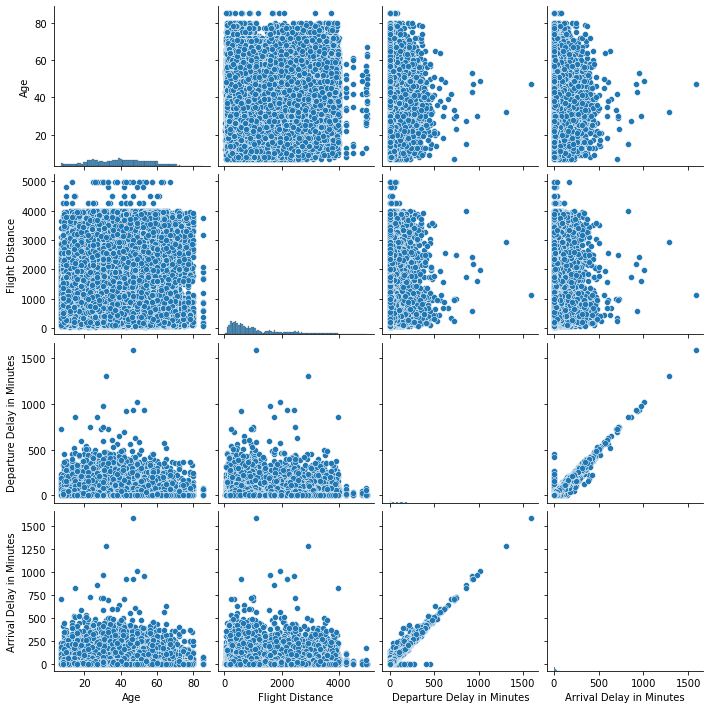

In [38]:
sns.pairplot(DataTrain_num)

Observando el gráfico podemos observar que existe una correlacion entre el retraso de salida y el de llegada. No parece existir otras correlación entre las variables. Para obtener la correlación de las variables vamos a realizar una regresion lineal múltiple.

## Regresión lineal múltiple

Para la realizar esta regresión lineal se va a tomar como variable dependiente el retraso de llegada(Arrival Delay in Minutes).

In [44]:
#Primero vamos a cambiar los espacios por _ en el nombre de las columnas que vamos a usar:
DataTrain_num = DataTrain_num.rename(columns={'Arrival Delay in Minutes':'Arrival_Delay_in_Minutes',
                                              'Departure Delay in Minutes':'Departure_Delay_in_Minutes',
                                              'Flight Distance': 'Flight_Distance'})
DataTrain_num.columns
lm = ols("Arrival_Delay_in_Minutes ~ Departure_Delay_in_Minutes + Flight_Distance + Age", data=DataTrain_num).fit()
print(lm.summary())

                               OLS Regression Results                               
Dep. Variable:     Arrival_Delay_in_Minutes   R-squared:                       0.922
Model:                                  OLS   Adj. R-squared:                  0.922
Method:                       Least Squares   F-statistic:                 4.099e+05
Date:                      Sat, 14 Jan 2023   Prob (F-statistic):               0.00
Time:                              09:15:44   Log-Likelihood:            -3.9456e+05
No. Observations:                    103904   AIC:                         7.891e+05
Df Residuals:                        103900   BIC:                         7.892e+05
Df Model:                                 3                                         
Covariance Type:                  nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

Una vez obtenidos los resultados de la regresión lineal mútiple vemos que solo la variable de retrasos de salida esta correlacionada con nuestra variable dependiente(coef=0,97) mientras que las otras dos variables tienen una correlación inexistente. Debido a esto, se va a optar por hacer un estudio de regresión lineal simple analizando la correlación entre el retraso de llegada y el de salida.

## Regresión lineal simple

### Relación entre variables

Antes de generar el modelo de regresión simple, se van ha representar los datos para poder intuir si existe una relación y cuantificar dicha relación mediante un coeficiente de correlación.

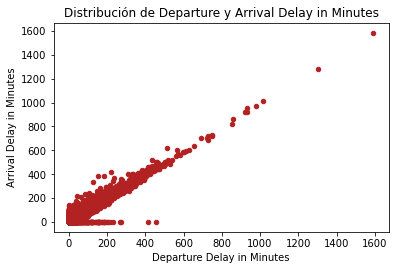

In [45]:
fig, ax = plt.subplots(figsize=(6, 3.84))
DataTrain.plot(x = 'Departure Delay in Minutes',y= 'Arrival Delay in Minutes',c = 'firebrick',kind = "scatter",ax = ax)
plt.title('Distribución de Departure y Arrival Delay in Minutes');

In [46]:
corr_test = pearsonr(x = DataTrain['Departure Delay in Minutes'], y =  DataTrain['Arrival Delay in Minutes'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  0.9602470986642818
P-value:  0.0


El gráfico y el test de correlación muestran una relación lineal, de intensidad considerable (r = 0.96) y significativa (p-value = 0.00). Tiene sentido intentar generar un modelo de regresión lineal con el objetivo de predecir el retraso de llegada en minutos en función del retraso de salida en minutos.

### Ajuste del modelo

Se ajusta el modelo empleando como variable respuesta 'Arrival Delay in Minutes'y como predictor 'Departure Delay in Minutes' Para poder hacer esta evaluación, se dividen los datos en dos grupos, uno de entrenamiento y otro de test.

In [51]:
#Dividimos los datos en train y en test
X = DataTrain[['Departure Delay in Minutes']]
y = DataTrain['Arrival Delay in Minutes']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
#Creamos el modelo
modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

LinearRegression()

In [52]:
#Información del modelo
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X, y))

Intercept: [0.74212478]
Coeficiente: [('Departure Delay in Minutes', 0.972896248635232)]
Coeficiente de determinación R^2: 0.922069710998865


Una vez entrenado el modelo, evaluamos la capacidad predictiva empleando el conjunto del test.

Para estimar el rendimiento y evaluar el ajuste del modelo vamos a obtener el error cuadratico medio RMSE

In [55]:
predicciones = modelo.predict(X = X_test)
print(predicciones[0:3,])

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")

[[12.41687977]
 [ 0.74212478]
 [ 8.52529477]]

El error (rmse) de test es: 10.944349653005428


Observamos que la tasa de error del modelo de regresión es 10.944

### Evaluamos el modelo de regresión

In [56]:
X = DataTrain[['Departure Delay in Minutes']]
y = DataTrain['Arrival Delay in Minutes']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [57]:
# Creación del modelo utilizando matrices 
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                 1.005e+06
Date:                Sat, 14 Jan 2023   Prob (F-statistic):               0.00
Time:                        09:18:14   Log-Likelihood:            -3.1536e+05
No. Observations:               83123   AIC:                         6.307e+05
Df Residuals:                   83121   BIC:                         6.307e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7421      0.040     18.565      0.0

### Intervalos de confianza de los coeficientes

In [58]:
modelo.conf_int(alpha=0.05)

array([[0.66377459, 0.82047498],
       [0.97099372, 0.97479878]])

### Predicciones

Una vez entrenado el modelo, obtenemos predicciones para el dataset.

In [59]:
# Predicciones con intervalo de confianza del 95%
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,0.742125,0.039975,0.663775,0.820475,-20.328853,21.813103
1,0.742125,0.039975,0.663775,0.820475,-20.328853,21.813103
2,0.742125,0.039975,0.663775,0.820475,-20.328853,21.813103
3,1.715021,0.039635,1.637336,1.792706,-19.355954,22.785996


### Representación gráfica del modelo

Además de la línea de mínimos cuadrados, es recomendable incluir los límites superior e inferior del intervalo de confianza. Esto permite identificar la región en la que, según el modelo generado y para un determinado nivel de confianza, se encuentra el valor promedio de la variable respuesta.

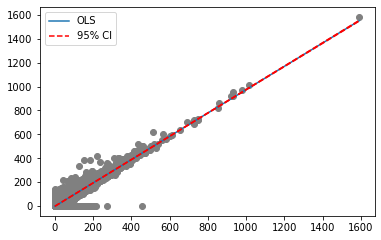

In [60]:
#Predicciones con intervalo de confianza al 95%
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

#Gráficamos el modelo
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
ax.legend();

### Error de test

In [61]:
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 10.944349653005387


### Ejemplos

In [62]:
predicciones[16]

44.5224559720549

In [63]:
X_test[16]

array([ 1., 45.])

In [132]:
y_test[16]

array([42.])

Para este ejemplo, el retraso de salida real del vuelo es de 45 min, el retraso real de llegada es de 42 min y nuestro modelo predice que el retraso es de 44.5 min.

In [133]:
predicciones[41]

0.7421247834707315

In [134]:
X_test[41]

array([1., 0.])

In [135]:
y_test[41]

array([0.])

Para este ejemplo, el retraso de salida real del vuelo es de 0 min, el retraso real de llegada es de 0 min y nuestro modelo predice que el retraso es de 0,74 min.